In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
diabetes = pd.read_csv('diabetes.csv')

In [11]:
np.random.seed(12345)
sample = diabetes.sample(n=25)
sample_mean = sample['Glucose'].mean()
sample_max = sample['Glucose'].max()
population_mean = diabetes['Glucose'].mean()
population_max = diabetes['Glucose'].max()

In [12]:
# Print the results
print('Mean_Sample_Glucose:', sample_mean)
print(' Maximum Sample Glucose:', sample_max)
print(' Mean  Population Glucose:', population_mean)
print(' Maximum Population Glucose:', population_max)

Sample Mean Glucose: 121.6
Sample Maximum Glucose: 195
Population Mean Glucose: 120.89453125
Population Maximum Glucose: 199


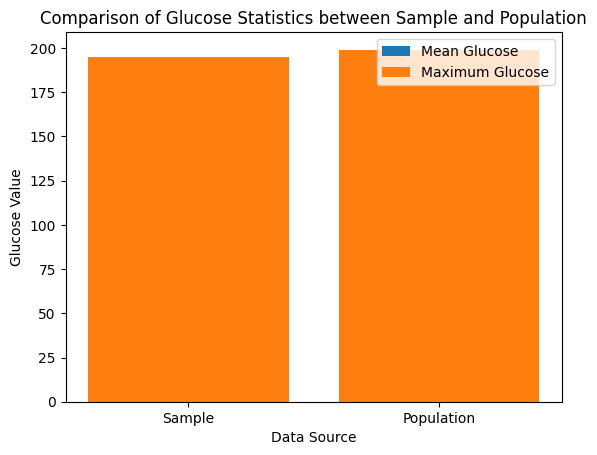

In [22]:
# Create a bar chart to compare sample and population statistics
fig, ax = plt.subplots()

ax.bar(['Sample', 'Population'], [sample_mean, population_mean], label='Mean Glucose')
ax.bar(['Sample', 'Population'], [sample_max, population_max], label='Maximum Glucose')

ax.set_xlabel('Data Source')
ax.set_ylabel('Glucose Value')
ax.set_title('Comparison of Glucose Statistics between Sample and Population')
ax.legend()

plt.show()


In [14]:
# Find the 98th percentile of BMI for the sample and population
sample_percentile = np.percentile(sample['BMI'], 98)
population_percentile = np.percentile(diabetes['BMI'], 98)

# Print the results
print('Sample 98th Percentile of BMI:', sample_percentile)
print('Population 98th Percentile of BMI:', population_percentile)


Sample 98th Percentile of BMI: 41.324
Population 98th Percentile of BMI: 47.52599999999996


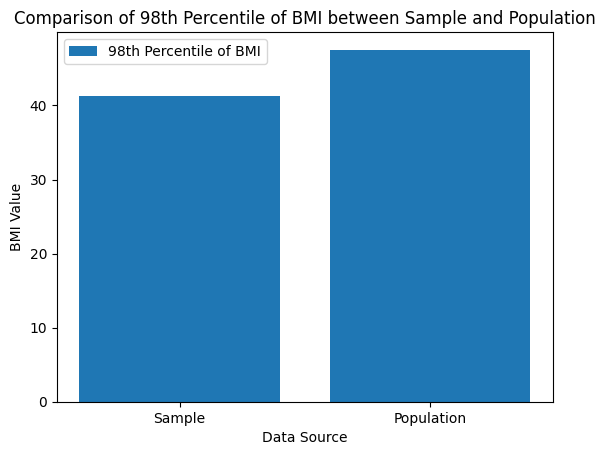

In [15]:
# Create a bar chart to compare sample and population percentiles
fig, ax = plt.subplots()

ax.bar(['Sample', 'Population'], [sample_percentile, population_percentile], label='98th Percentile of BMI')

ax.set_xlabel('Data Source')
ax.set_ylabel('BMI Value')
ax.set_title('Comparison of 98th Percentile of BMI between Sample and Population')
ax.legend()

plt.show()


In [16]:
# Set the number of bootstrap samples and sample size
n_bootstrap = 500
sample_size = 150

# Create an empty list to store the bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Loop through each bootstrap sample
for i in range(n_bootstrap):
    # Take a random sample of 150 observations with replacement
    bootstrap_sample = np.random.choice(diabetes['BloodPressure'], size=sample_size, replace=True)
    
    # Calculate the mean, standard deviation, and 98th percentile of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_std = np.std(bootstrap_sample)
    bootstrap_percentile = np.percentile(bootstrap_sample, 98)
    
    # Add the bootstrap statistics to the list
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile)


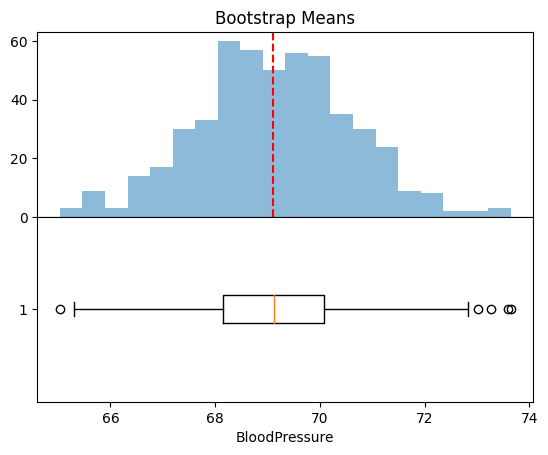

In [17]:
# Create a histogram and box plot for the bootstrap means
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

axs[0].hist(bootstrap_means, bins=20, alpha=0.5)
axs[0].axvline(diabetes['BloodPressure'].mean(), color='r', linestyle='--', label='Population Mean')
axs[0].set_title('Bootstrap Means')

axs[1].boxplot(bootstrap_means, vert=False)
axs[1].set_xlabel('BloodPressure')

plt.show()


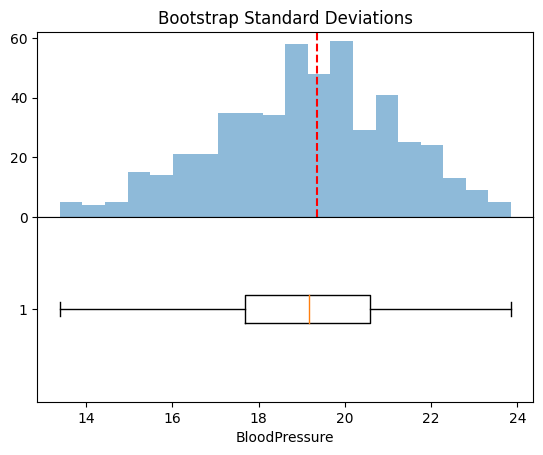

In [18]:
# Create a histogram and box plot for the bootstrap standard deviations
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

axs[0].hist(bootstrap_stds, bins=20, alpha=0.5)
axs[0].axvline(diabetes['BloodPressure'].std(), color='r', linestyle='--', label='Population Standard Deviation')
axs[0].set_title('Bootstrap Standard Deviations')

axs[1].boxplot(bootstrap_stds, vert=False)
axs[1].set_xlabel('BloodPressure')

plt.show()


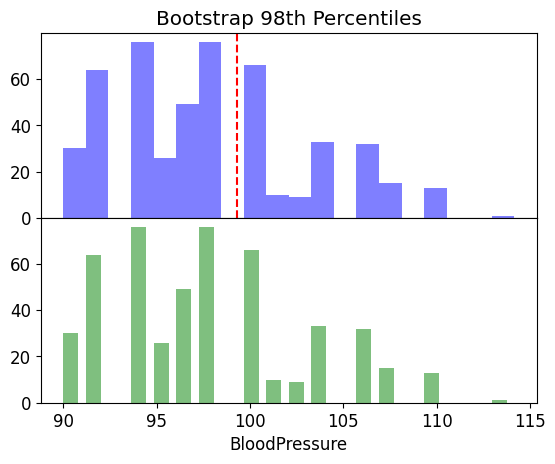

In [24]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

color = 'blue'
alpha = 0.5
bins = 20

axs[0].hist(bootstrap_percentiles, bins=bins, alpha=alpha, color=color)
axs[0].axvline(np.percentile(diabetes['BloodPressure'], 98), color='r', linestyle='--', label='Population 98th Percentile')
axs[0].set_title('Bootstrap 98th Percentiles')

bar_color = 'green'
bar_width = 0.8

axs[1].hist(bootstrap_percentiles, bins=bins, alpha=alpha, color=color)
axs[1].set_xlabel('BloodPressure')

for patch in axs[1].patches:
    patch.set_fc(bar_color)
    patch.set_alpha(alpha)
    patch.set_width(bar_width)

plt.show()

